# Pipeline for analysis

## Pre processing raw data

Importing the appropiate directories

In [ ]:
from DE import networkAnalysis as na

clusterDirectory need to point towards directory in which all the clusters can be found. 
It will then loop through all of the data files, gathering the sample ids from all cluster and create individual .csv files for analysis in R

In [ ]:
csvpath = "data/expressionData/fpkm.csv"
obj = na()
obj.readCsv(csvpath, sep = '\t')

In [ ]:
obj.preProcess()

In [ ]:
#Set which bottom percentage you intend to filter away
bottom = 0.5
obj.preFilter(bottom)

In [ ]:
#Writes the pre processed and filtered, MUST be .txt and tab separated values
obj.filterDf.to_csv(f'data/expressionData/filtered(21k).txt', sep = '\t', index = False)

Configure test.properties and run VRLA using following command in the same directory as VRLA:

java -jar VRLA.jar

## Expression analysis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


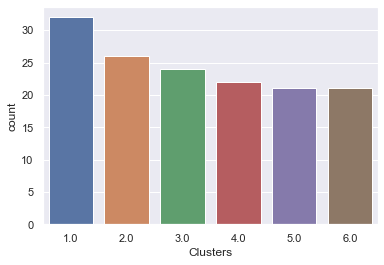

In [35]:
from DE import networkAnalysis as na
import pandas as pd
import seaborn as sns
csvpath = 'data/GEX.txt'
SRIQ_cluster_path = 'data/6'

obj = na()

obj.readSRIQ(csvpath, SRIQ_cluster_path, columnname='Unnamed: 0')

## Visualing genes across clusters

Takes single list of genes as argument

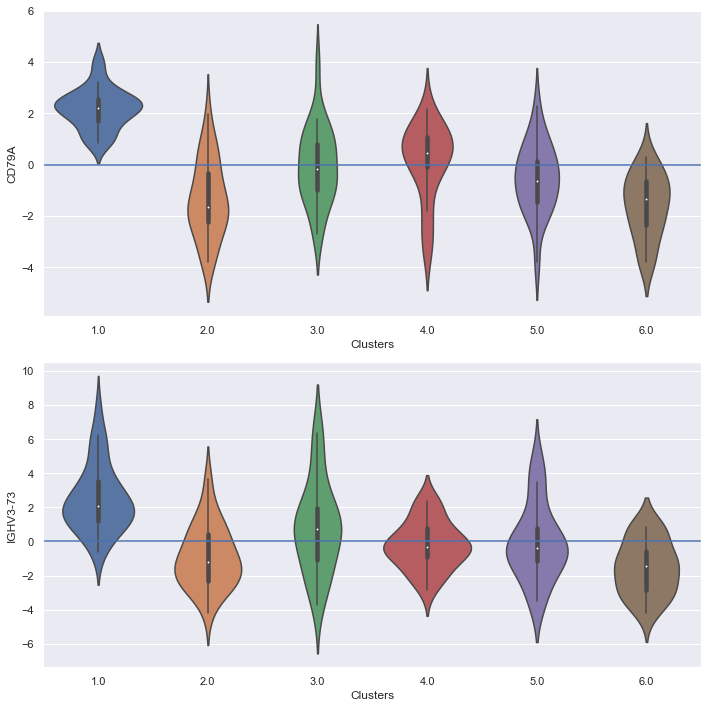

In [41]:
obj.plotSingleGene(['CD79A', 'IGHV3-73'])

Takes list of lists of genes as argument

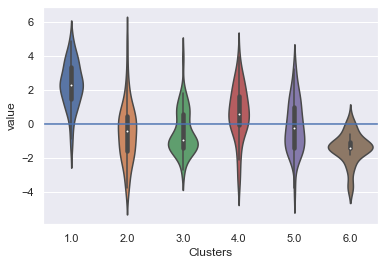

In [43]:
obj.plotMultipleGenes([['CHIT1', 'CD79A']])

## Visualization of variation

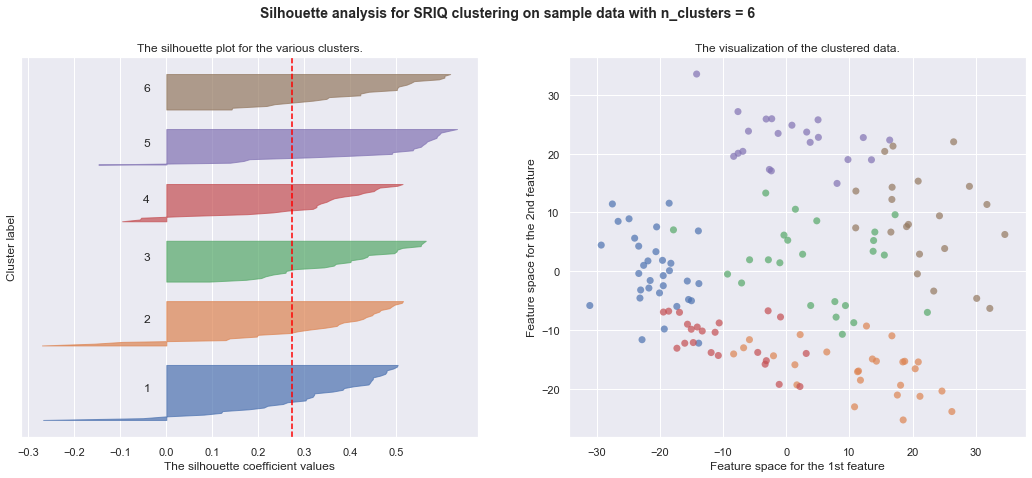

In [49]:
obj.SilhouttePlot(sizes = 200)

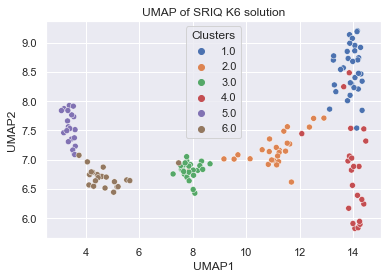

In [52]:
obj.Umap(10,0.2, 5)

## SAM analysis

In [ ]:
props = '/Users/jacobkarlstrom/projekt/SRIQ/software/VRLA/resources/test.properties'
expressionData = '/Users/jacobkarlstrom/projekt/SRIQ/notebook/data/expressionData/DEG.txt'
dist = 0.55

obj.samAnalysis(properties = props, expressionData = expressionData, dist = dist, spiral = True)

### Visualizing DEG

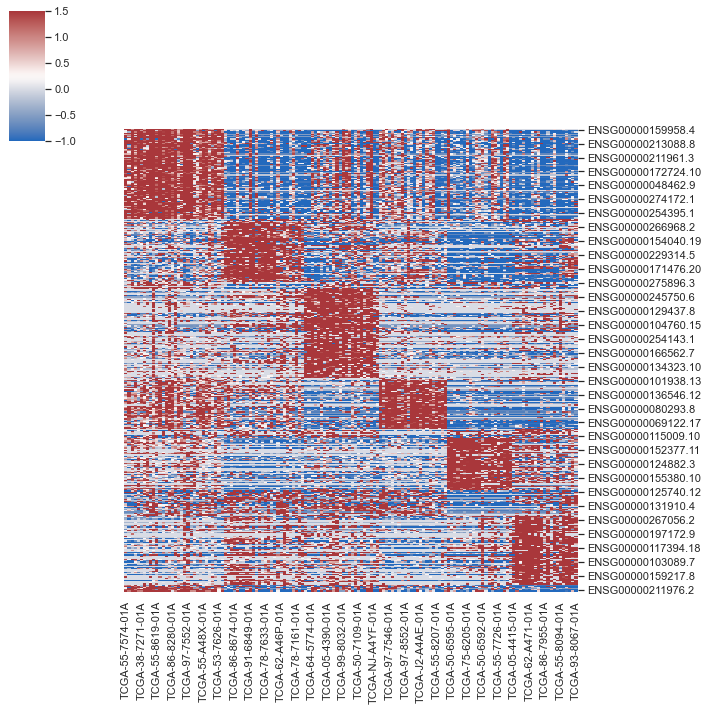

In [53]:
resultsPath = 'data/log-median-res_6C/Results_log_0.61_6/LUAD_ens_q_Data_in_6_ClusterOrder_ABS_Unique.txt'

obj.plotSamResults(resultsPath, q = 4, lfc = 0)

## Enrichment analysis

Converts the enrichment list to symbols if in ensembleIDs

In [54]:
scopes = 'ensembl.gene'
obj.ensemble2gene(scopes)

Performs enrichment analysis from the differentially expressed genes.

In [55]:
enrichDbs = ['GO_Biological_Process_2018', 'GO_Cellular_Component_2018', 'GO_Molecular_Function_2018']
obj.enrichR(dbs = enrichDbs)

Running for cluster 1 up
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 1 down
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 2 up
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 2 down
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 3 up
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 3 down
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 4 up
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 4 down
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 5 up
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 5 down
GO_Biologic

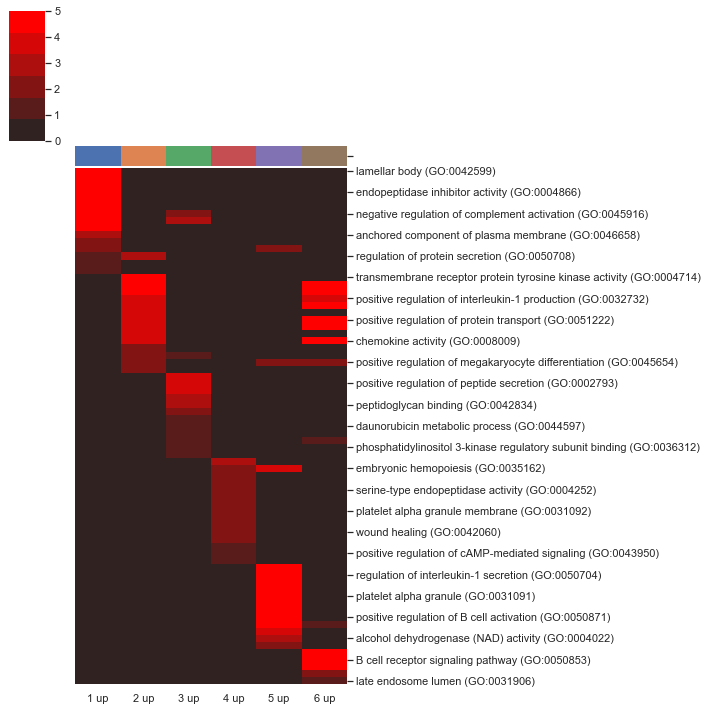

In [56]:
#up or down
u_d = 'up'

obj.plotEnrichmentResults(u_d=u_d)